### HW_Обучение_без_учителя_в_Scikit_learn

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [6]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

/home/kanykei/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

/home/kanykei/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


До:	(404, 13)
После:	(404, 2)


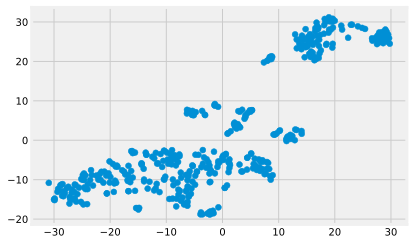

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter = 100)

In [15]:
labels_train = model.fit_predict(X_train_scaled)

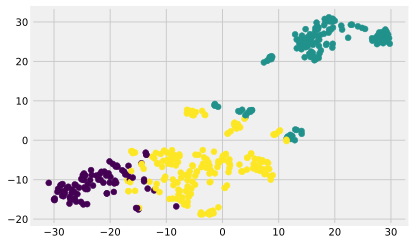

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [18]:
y_train.mean()

price    22.796535
dtype: float64

In [19]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [20]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

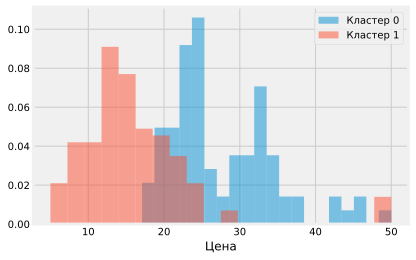

In [27]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

In [29]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853


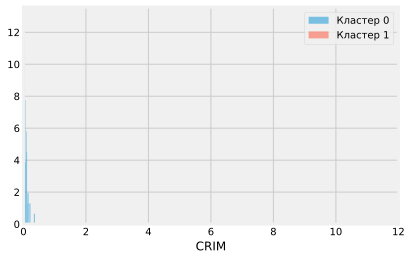

In [30]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')

plt.show()

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [25]:
labels_test = model.predict(X_test_scaled)

In [31]:
y_test.mean()

price    21.488235
dtype: float64

In [32]:
y_test[labels_test == 0].mean()

price    31.35
dtype: float64

In [33]:
y_test[labels_test== 1].mean()

price    16.437143
dtype: float64

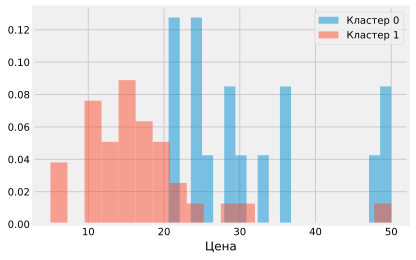

In [34]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

In [35]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))

Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143


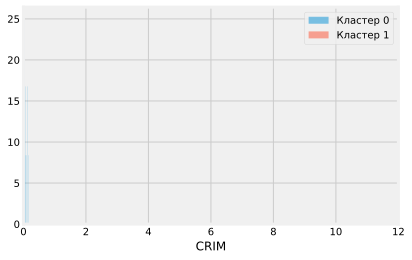

In [36]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')

plt.show()